## Mini Project III

In [1]:
import pandas as pd
import numpy as np
# import visualize
import matplotlib.pyplot as plt
import seaborn as sns
# import Kmeans from sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# import DBSCAN
from sklearn.cluster import DBSCAN
# Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# Cluster hierarchy
import scipy.cluster.hierarchy as sch
from scipy import stats

### Do they have savings account? How much do they save?

In [2]:
customer = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\customer.csv")

In [3]:
customer.groupby(['age']).mean()
print(customer.groupby(['age']).mean().to_markdown())

|   age |     cust_id |   income |   years_with_bank |   nbr_children |   marital_status |   street_nbr |   postal_code |
|------:|------------:|---------:|------------------:|---------------:|-----------------:|-------------:|--------------:|
|    13 | 1.36287e+06 |     0    |           4.8     |       0        |          1       |      8804.2  |       74159.2 |
|    14 | 1.36295e+06 |     0    |           6       |       0        |          1       |      9692.6  |       69021   |
|    15 | 1.36297e+06 |     0    |           4.1875  |       0        |          1       |      7903.31 |       74254.9 |
|    16 | 1.36304e+06 |     0    |           1       |       0        |          1       |     10150.9  |       64658.9 |
|    17 | 1.36299e+06 |     0    |           2       |       0        |          1       |      7545.38 |       41598   |
|    18 | 1.36295e+06 |  9722.9  |           3       |       0        |          1       |     10306.8  |       62792.2 |
|    19 | 1.36299e+06 | 

In [4]:
customer_age = customer[['cust_id','age']]

In [5]:
customer_age['age_bin'] = pd.cut(x = customer_age['age'], bins = [13, 20, 40, 60, 90])

C:\Users\quang\AppData\Local\Temp\ipykernel_10176\1278101733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_age['age_bin'] = pd.cut(x = customer_age['age'], bins = [13, 20, 40, 60, 90])


In [6]:
customer_age

,cust_id,age,age_bin
0,1362691,46,"(40, 60]"
1,1362487,71,"(60, 90]"
2,1363160,38,"(20, 40]"
3,1362752,54,"(40, 60]"
4,1362548,59,"(40, 60]"
...,...,...,...
742,1363324,36,"(20, 40]"
743,1362895,56,"(40, 60]"
744,1362569,50,"(40, 60]"
745,1363364,37,"(20, 40]"


In [7]:
# get age_bin dummy
age_data = pd.get_dummies(customer_age, columns = ['age_bin']).drop(columns = ['cust_id'])
# concatenate with the previous dataframe
customer_age_data = pd.concat([customer_age,age_data], ignore_index=False, axis = 1).drop(columns = ['age'])

In [8]:
customer_age_data

,cust_id,age_bin,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,1362691,"(40, 60]",0,0,1,0
1,1362487,"(60, 90]",0,0,0,1
2,1363160,"(20, 40]",0,1,0,0
3,1362752,"(40, 60]",0,0,1,0
4,1362548,"(40, 60]",0,0,1,0
...,...,...,...,...,...,...
742,1363324,"(20, 40]",0,1,0,0
743,1362895,"(40, 60]",0,0,1,0
744,1362569,"(40, 60]",0,0,1,0
745,1363364,"(20, 40]",0,1,0,0


In [33]:
saving_accounts = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\saving_accounts.csv").drop(columns = ['acct_start_date','acct_end_date'])
saving_transaction = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\saving_transactions.csv")

In [10]:
saving_accounts

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,113.04,122.54
1,1362487,13624873,500,MM,N,651.73,12.89
2,1362548,13625483,100,BS,Y,250.24,254.02
3,1362752,13627523,100,BS,Y,600.26,609.33
4,1363017,13630173,100,BS,N,2011.02,2901.35
...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,177.33,528.57
417,1363038,13630383,100,BS,Y,333.53,508.26
418,1362529,13625293,100,BS,Y,662.06,873.14
419,1362895,13628953,100,BS,Y,169.96,96.25


In [11]:
saving_accounts['account_active'] = saving_accounts['account_active'].replace({'Y':1,'N':0})

In [12]:
customer_saving = pd.merge(saving_accounts, customer_age_data, how = 'inner')

In [34]:
customer_data = pd.merge(customer_saving, saving_transaction, how = 'inner')

In [35]:
cluster_data = customer_data[['acct_type','age_bin','minimum_balance', 'starting_balance', 'ending_balance','tran_amt','account_active','age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]','age_bin_(60, 90]' ]]

In [36]:
cluster_data

,acct_type,age_bin,minimum_balance,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,BS,"(20, 40]",100,113.04,122.54,0.00,1,0,1,0,0
1,BS,"(20, 40]",100,113.04,122.54,-248.66,1,0,1,0,0
2,BS,"(20, 40]",100,113.04,122.54,151.47,1,0,1,0,0
3,BS,"(20, 40]",100,113.04,122.54,0.32,1,0,1,0,0
4,BS,"(20, 40]",100,113.04,122.54,0.08,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11184,BS,"(20, 40]",100,167.71,161.04,0.00,1,0,1,0,0
11185,BS,"(20, 40]",100,167.71,161.04,138.44,1,0,1,0,0
11186,BS,"(20, 40]",100,167.71,161.04,119.07,1,0,1,0,0
11187,BS,"(20, 40]",100,167.71,161.04,-40.00,1,0,1,0,0


In [37]:
# scale data
cluster_data.dropna(inplace = True)
cols = ['minimum_balance', 'starting_balance', 'ending_balance', 'tran_amt', 'account_active', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']
cols_scaled = ['minimum_balance_scaled', 'starting_balance_scaled', 'ending_balance_scaled','tran_amt', 'account_active_scaled', 'age_bin_(13, 20]_scaled', 'age_bin_(20, 40]_scaled', 'age_bin_(40, 60]_scaled', 'age_bin_(60, 90]_scaled']
scaler = StandardScaler()
cluster_data[cols_scaled] = scaler.fit_transform(cluster_data[cols])
cluster_data.head()

C:\Users\quang\AppData\Local\Temp\ipykernel_10176\1282470694.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\quang\AppData\Local\Temp\ipykernel_10176\1282470694.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\quang\AppData\Local\Temp\ipykernel_10176\1282470694.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,acct_type,age_bin,minimum_balance,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]",minimum_balance_scaled,starting_balance_scaled,ending_balance_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled"
0,BS,"(20, 40]",100,113.04,122.54,-0.063888,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036
1,BS,"(20, 40]",100,113.04,122.54,-1.173635,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036
2,BS,"(20, 40]",100,113.04,122.54,0.612109,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036
3,BS,"(20, 40]",100,113.04,122.54,-0.062460,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036
4,BS,"(20, 40]",100,113.04,122.54,-0.063531,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036


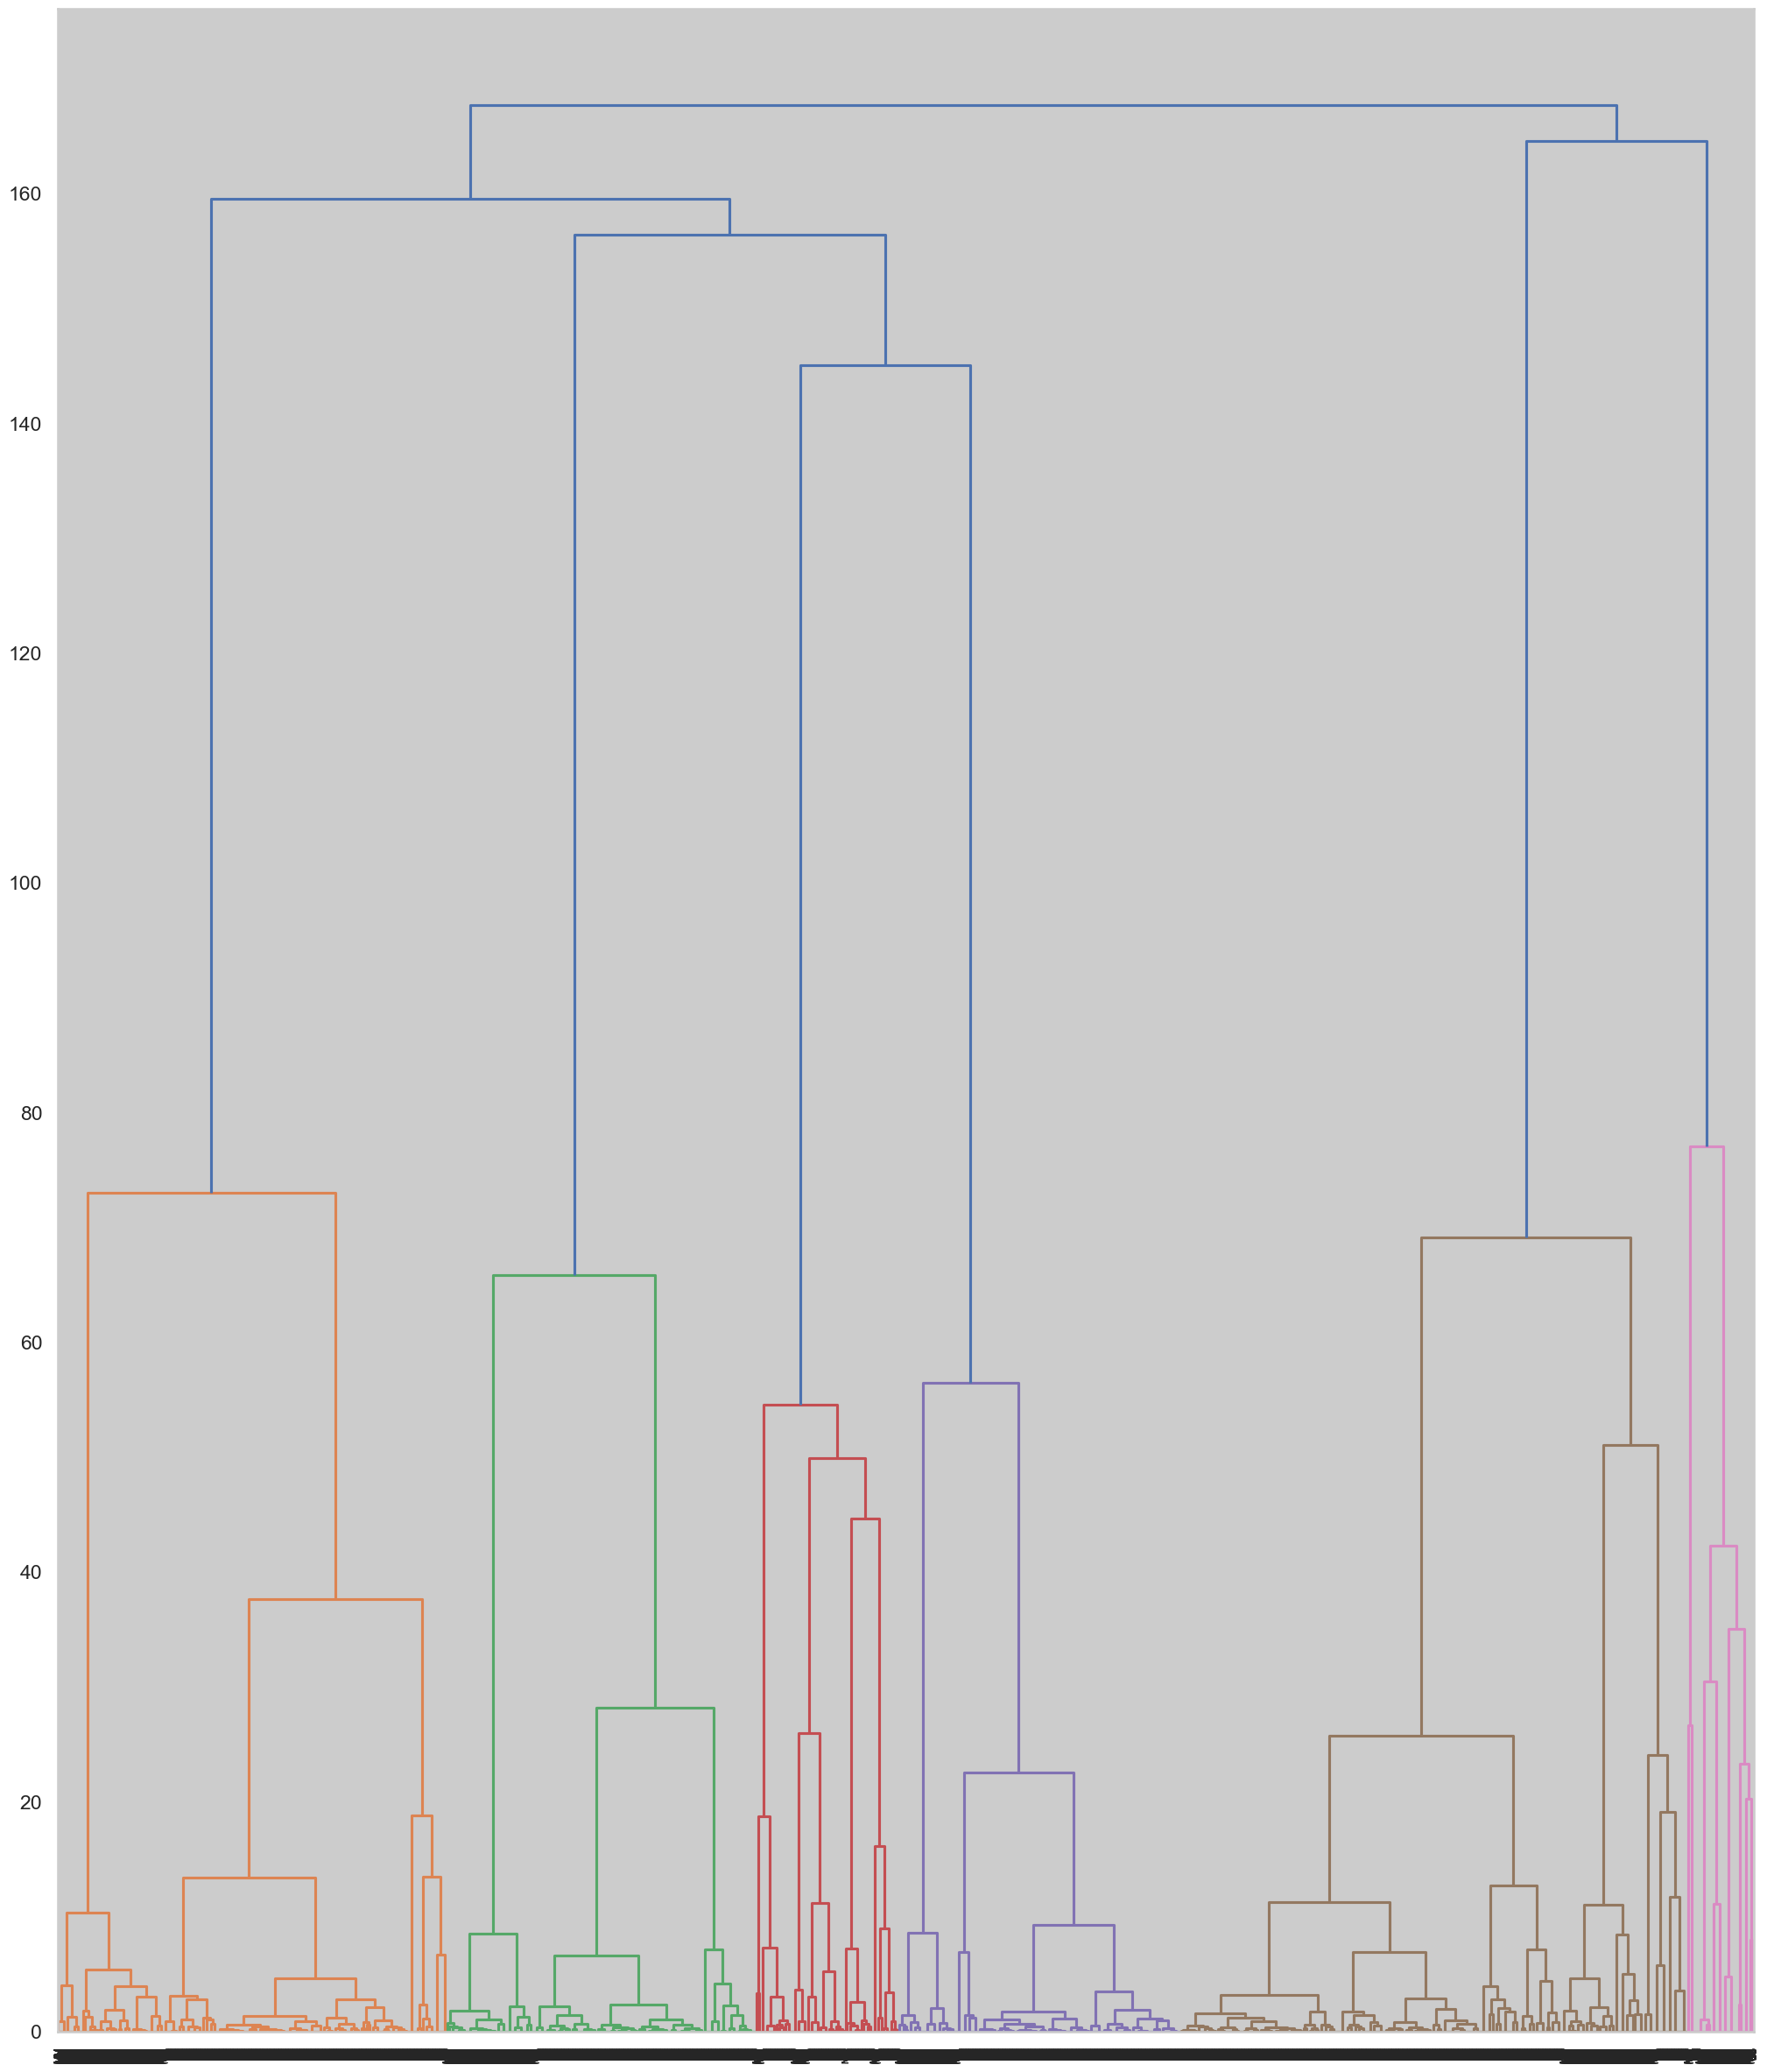

In [38]:
linkage_type = 'ward'
cluster_new = cluster_data.iloc[:, 11:]
linkage_matrix = linkage(cluster_new, linkage_type)

plt.figure(figsize=(25,30))
labels = list(cluster_data['acct_type'])

# plot using 'dendrogram()'
dendrogram(linkage_matrix, labels=labels,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.)

plt.show()

In [62]:
#Run Clustering
model = AgglomerativeClustering(n_clusters = 4)
model.fit(cluster_new)

AgglomerativeClustering(n_clusters=4)

In [67]:
#Adding cluster column from output of model
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
cluster_new = cluster_data.iloc[:, 11:]

clustering_model.fit(cluster_new)
label = clustering_model.labels_
print(label)

cluster_data['cluster'] = label
cluster_data.dropna(inplace = True)
cluster_data.head()

[2 2 2 ... 2 2 2]


C:\Users\quang\AppData\Local\Temp\ipykernel_10176\3740549450.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\quang\AppData\Local\Temp\ipykernel_10176\3740549450.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,acct_type,age_bin,minimum_balance,starting_balance,ending_balance,tran_amt,account_active,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]",minimum_balance_scaled,starting_balance_scaled,ending_balance_scaled,account_active_scaled,"age_bin_(13, 20]_scaled","age_bin_(20, 40]_scaled","age_bin_(40, 60]_scaled","age_bin_(60, 90]_scaled",cluster
0,BS,"(20, 40]",100,113.04,122.54,-0.063888,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036,2
1,BS,"(20, 40]",100,113.04,122.54,-1.173635,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036,2
2,BS,"(20, 40]",100,113.04,122.54,0.612109,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036,2
3,BS,"(20, 40]",100,113.04,122.54,-0.062460,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036,2
4,BS,"(20, 40]",100,113.04,122.54,-0.063531,1,0,1,0,0,-0.581204,-0.458635,-0.551811,0.303636,-0.507824,1.680883,-0.7156,-0.492036,2


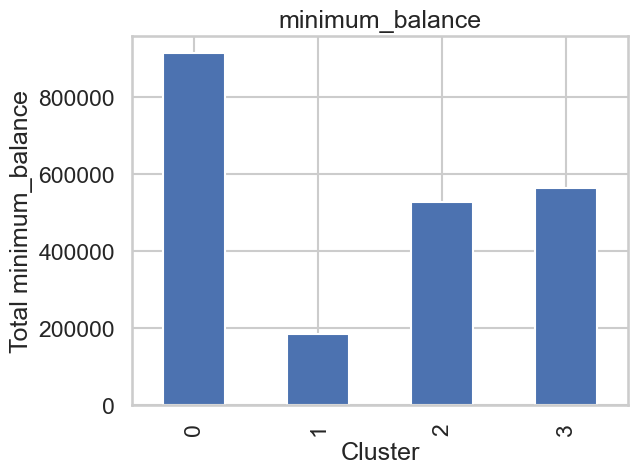

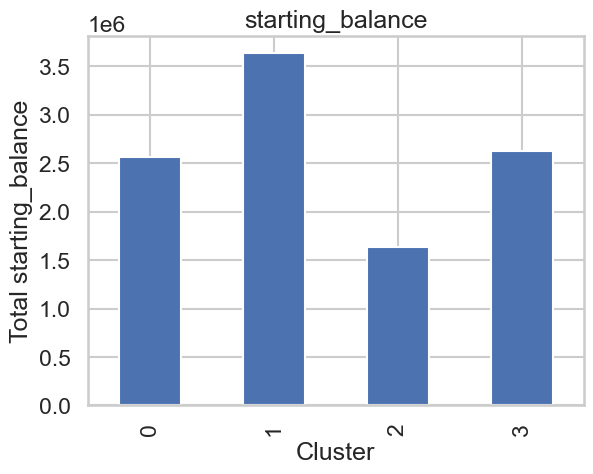

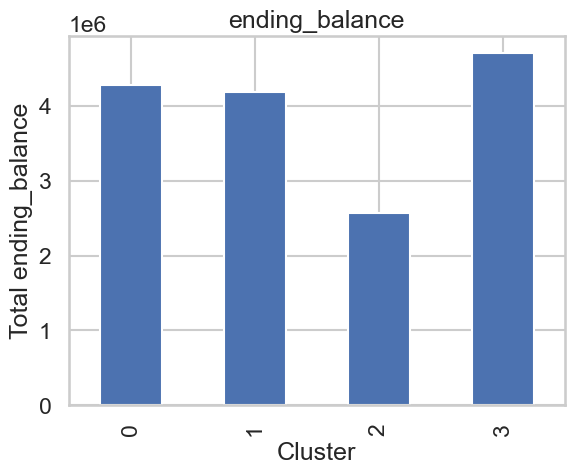

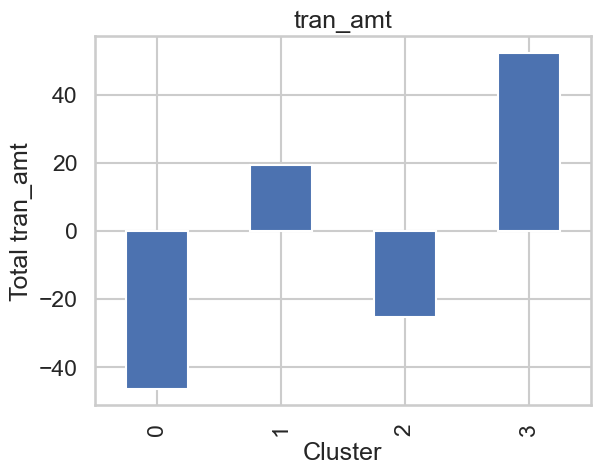

In [68]:
# Visualize the results by total
features = list(cluster_data.columns)[2:6]
for x in features:
  plt.figure()
  cluster_data.groupby(["cluster"])[x].sum().plot(kind="bar", ylabel='Total ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

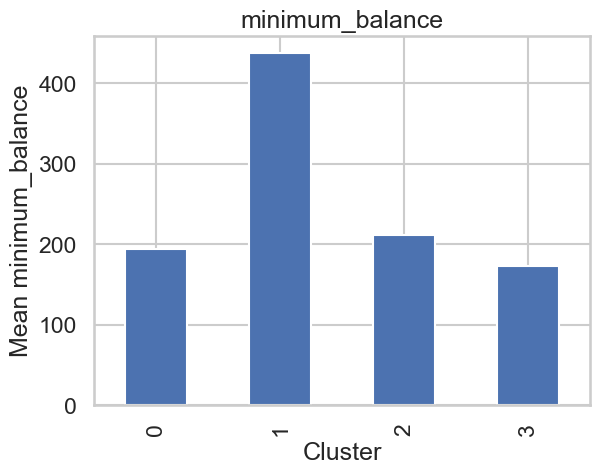

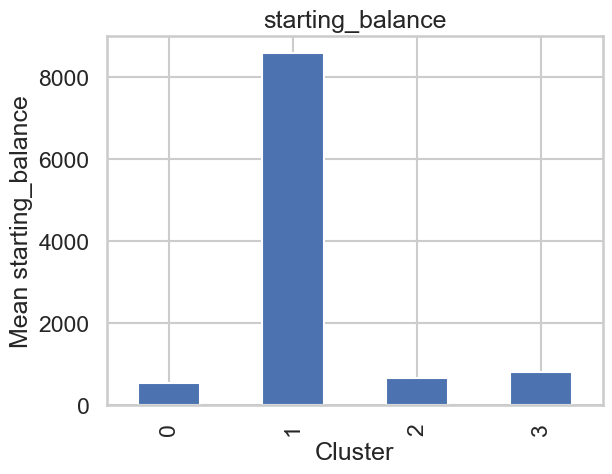

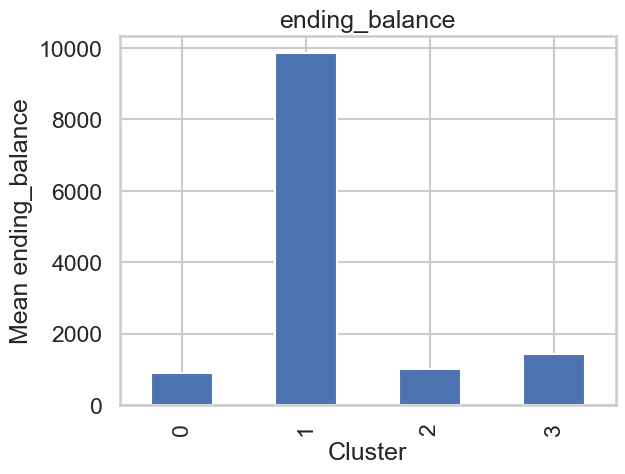

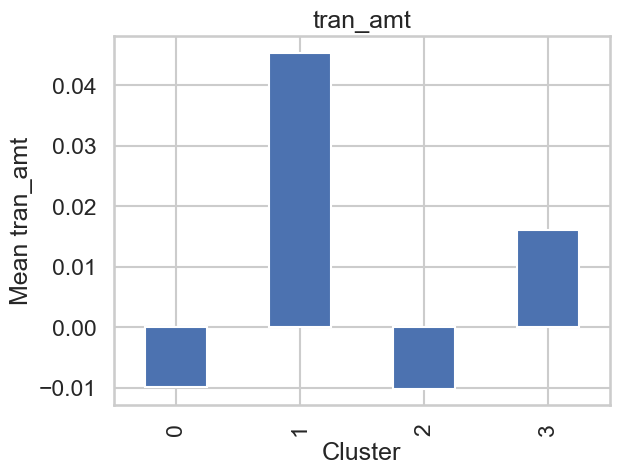

In [69]:
# Visualize the results by mean
features = list(cluster_data.columns)[2:6]
for x in features:
  plt.figure()
  cluster_data.groupby(["cluster"])[x].mean().plot(kind="bar", ylabel='Mean ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

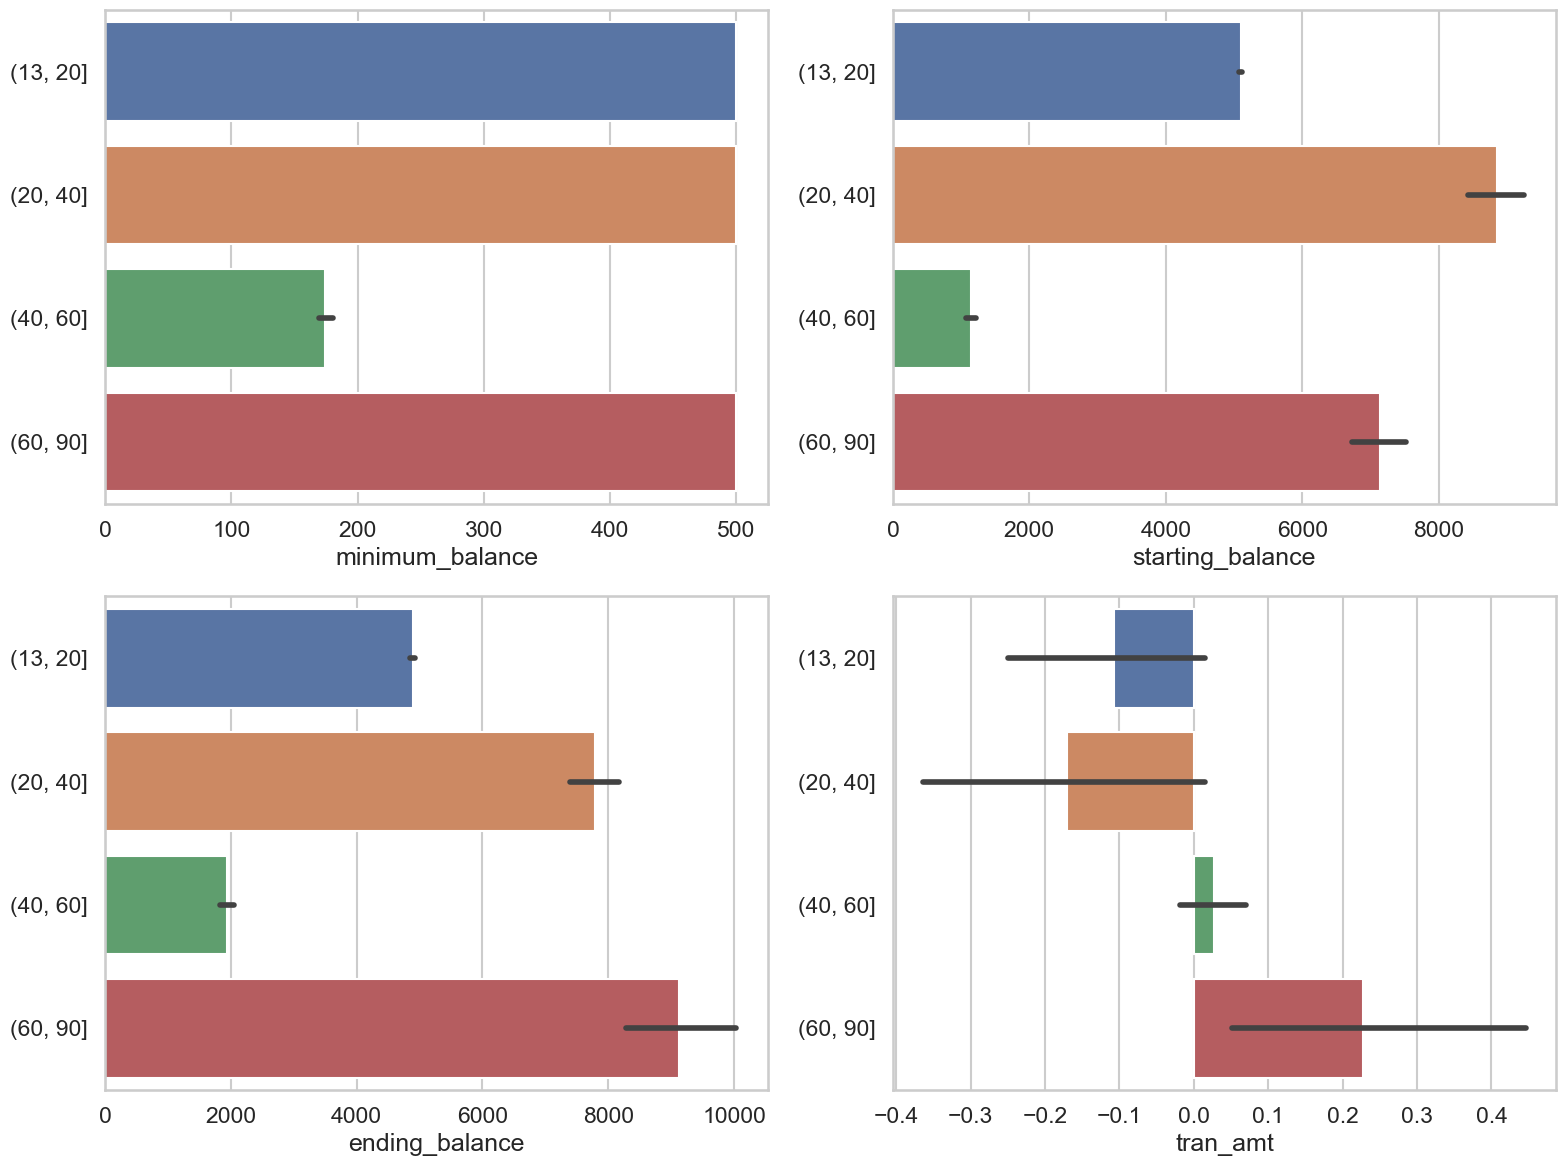

In [50]:
# Cluster 0
cluster0 = cluster_data[cluster_data['cluster'] == 0.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_1 = cluster0.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_1, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

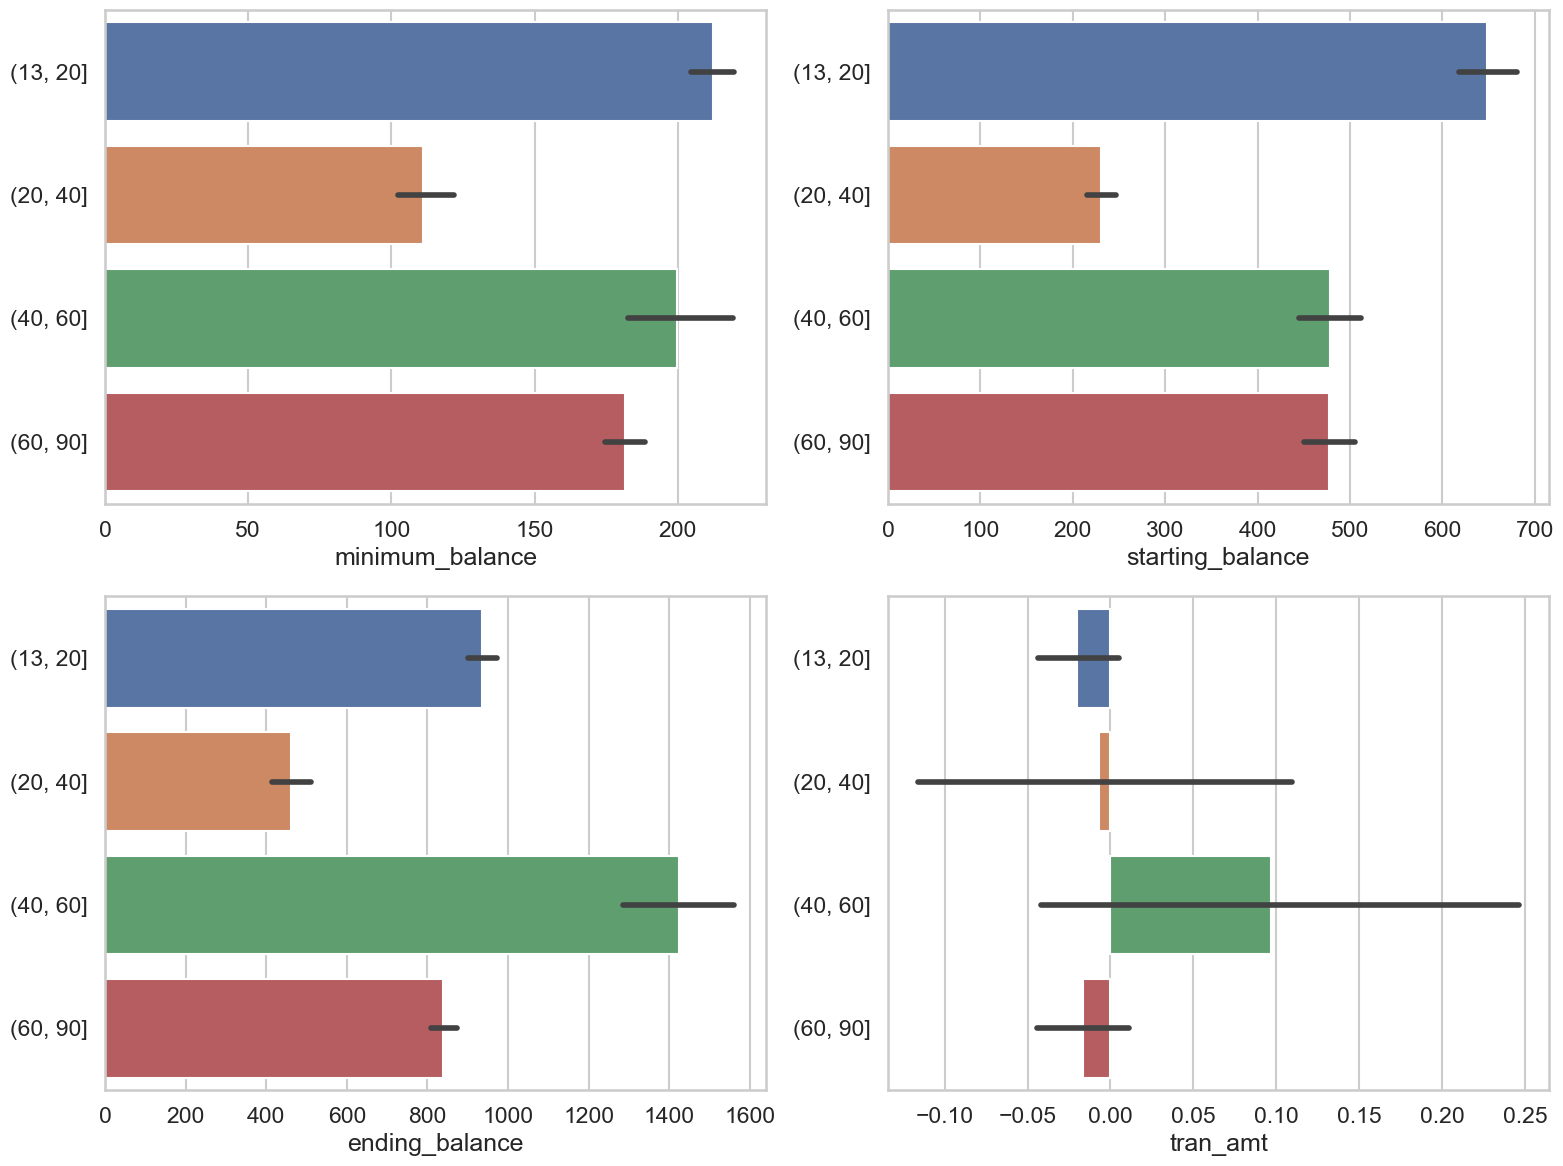

In [51]:
# Cluster 1
cluster1 = cluster_data[cluster_data['cluster'] == 1.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_2 = cluster1.sort_values(by=features[i*2 + j], ascending=False)
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_2, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

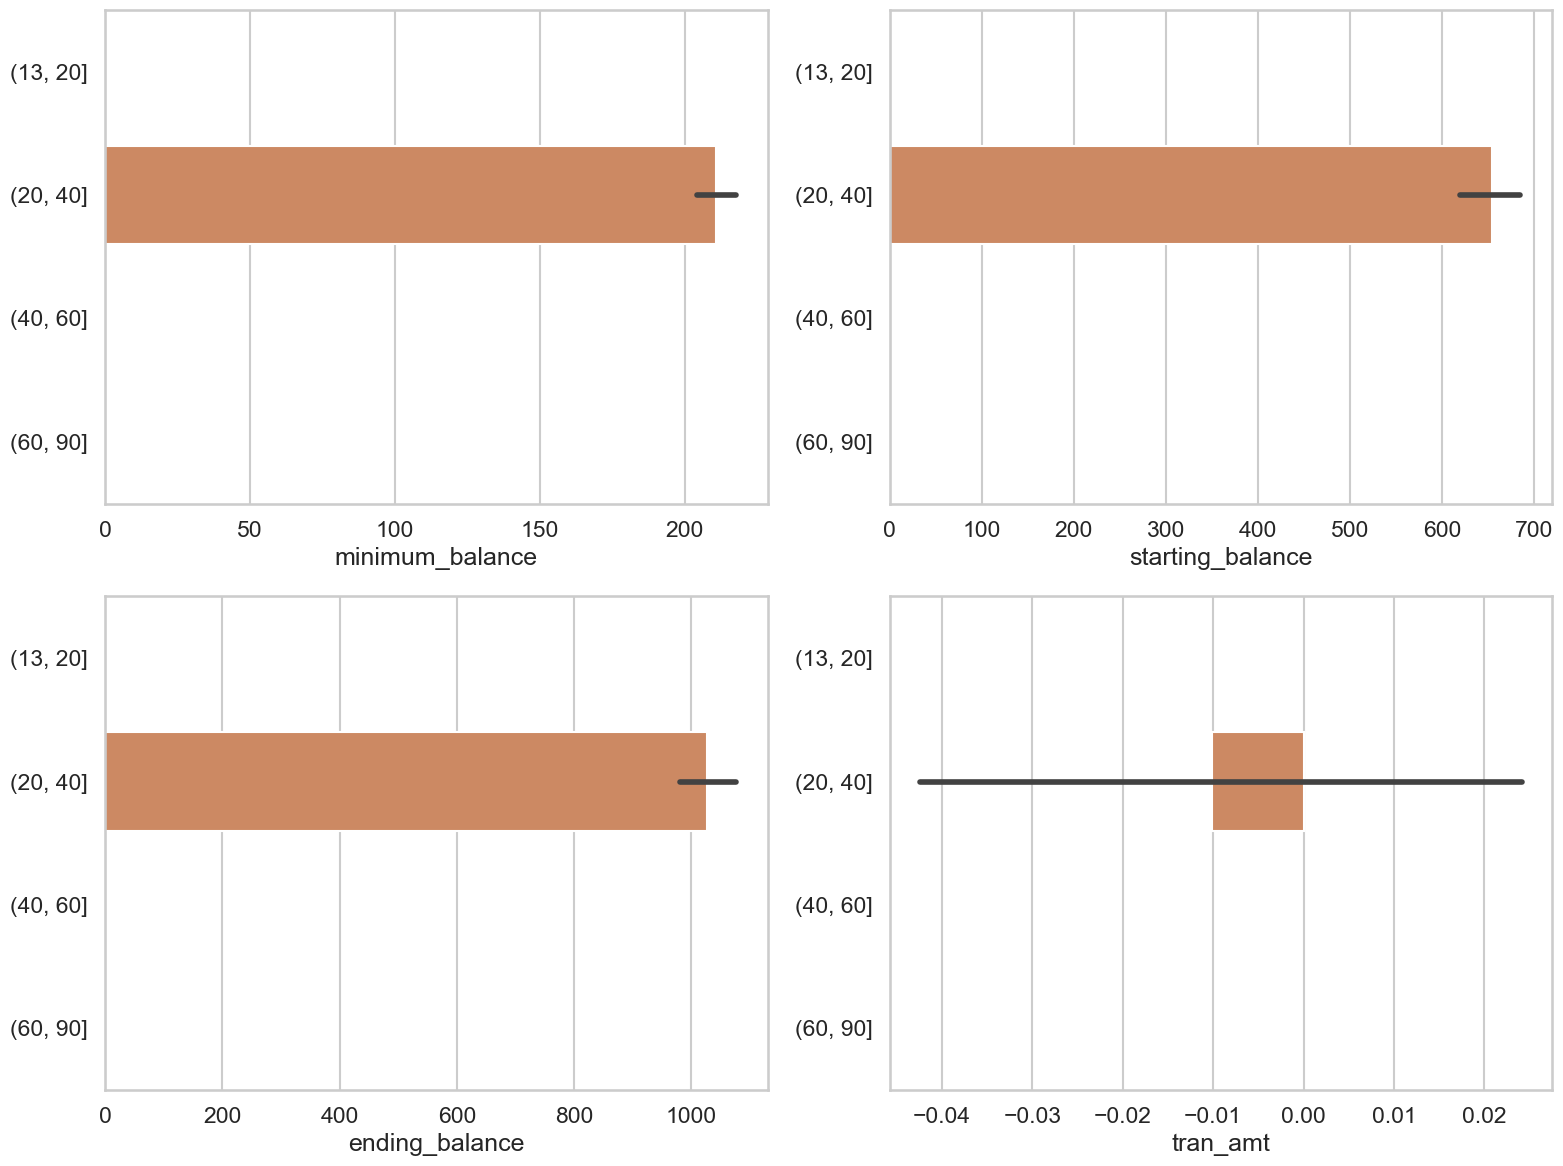

In [52]:
# Cluster 2
cluster2 = cluster_data[cluster_data['cluster'] == 2.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_3 = cluster2.sort_values(by=features[i*2 + j], ascending=False)
        #clustertop = cluster2.head()
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_3, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

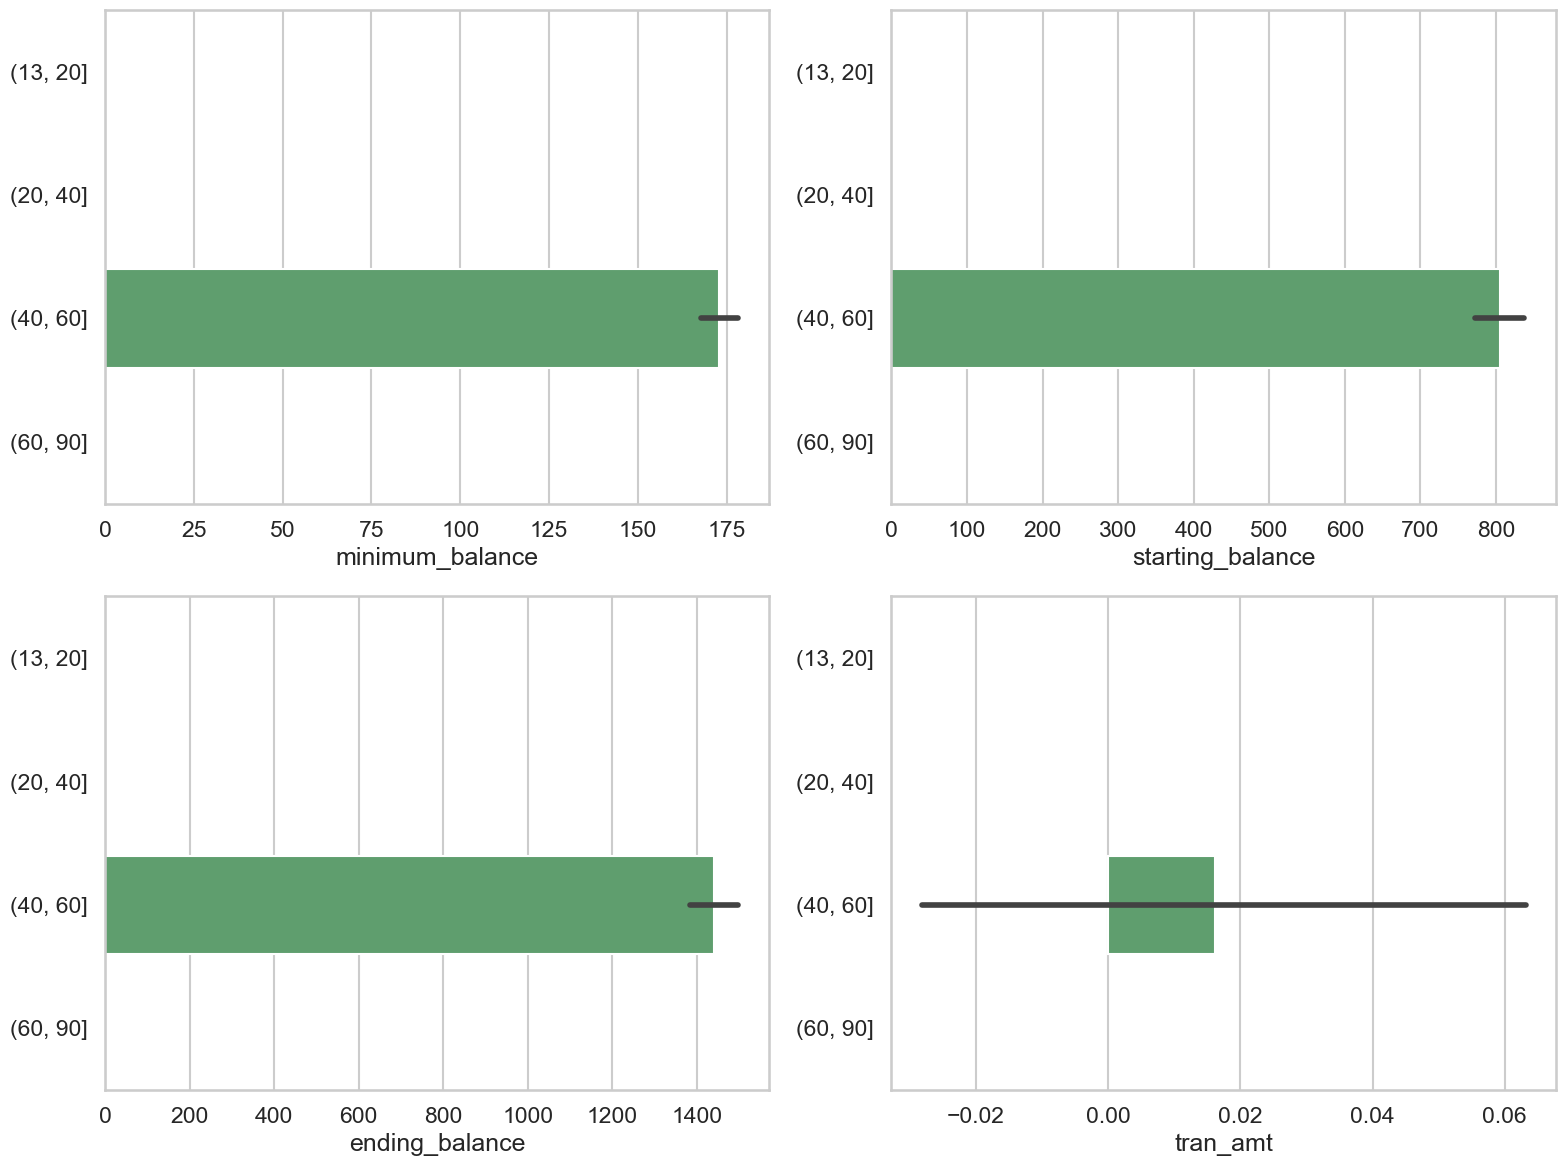

In [70]:
# Cluster 3
cluster3 = cluster_data[cluster_data['cluster'] == 3.0]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
import seaborn as sns
sns.set(style='whitegrid', context='talk')
for i in range(2):
    for j in range(2):
        cluster_4 = cluster3.sort_values(by=features[i*2 + j], ascending=False)
        #clustertop = cluster2.head()
        sns.barplot(y = 'age_bin', x=features[i*2 + j], data=cluster_4, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

In [71]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()

In [72]:
saving_radar = cluster_data[['cluster','account_active','minimum_balance','starting_balance','ending_balance','tran_amt', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']]

In [73]:
saving_radar

,cluster,account_active,minimum_balance,starting_balance,ending_balance,tran_amt,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,2,1,100,113.04,122.54,-0.063888,0,1,0,0
1,2,1,100,113.04,122.54,-1.173635,0,1,0,0
2,2,1,100,113.04,122.54,0.612109,0,1,0,0
3,2,1,100,113.04,122.54,-0.062460,0,1,0,0
4,2,1,100,113.04,122.54,-0.063531,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11184,2,1,100,167.71,161.04,-0.063888,0,1,0,0
11185,2,1,100,167.71,161.04,0.553957,0,1,0,0
11186,2,1,100,167.71,161.04,0.467511,0,1,0,0
11187,2,1,100,167.71,161.04,-0.242404,0,1,0,0


In [74]:
col = ['account_active', 'minimum_balance', 'starting_balance', 'ending_balance','tran_amt', 'age_bin_(13, 20]', 'age_bin_(20, 40]', 'age_bin_(40, 60]', 'age_bin_(60, 90]']
saving_radar[col] = min_max_scale.fit_transform(saving_radar[col])
saving_radar

C:\Users\quang\AppData\Local\Temp\ipykernel_10176\3063527871.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster,account_active,minimum_balance,starting_balance,ending_balance,tran_amt,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,2,1.0,0.0,0.000744,0.005341,0.357858,0.0,1.0,0.0,0.0
1,2,1.0,0.0,0.000744,0.005341,0.322206,0.0,1.0,0.0,0.0
2,2,1.0,0.0,0.000744,0.005341,0.379576,0.0,1.0,0.0,0.0
3,2,1.0,0.0,0.000744,0.005341,0.357904,0.0,1.0,0.0,0.0
4,2,1.0,0.0,0.000744,0.005341,0.357870,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11184,2,1.0,0.0,0.003922,0.007057,0.357858,0.0,1.0,0.0,0.0
11185,2,1.0,0.0,0.003922,0.007057,0.377708,0.0,1.0,0.0,0.0
11186,2,1.0,0.0,0.003922,0.007057,0.374931,0.0,1.0,0.0,0.0
11187,2,1.0,0.0,0.003922,0.007057,0.352123,0.0,1.0,0.0,0.0


In [75]:
saving_radar = saving_radar.groupby(['cluster']).mean().reset_index()
saving_radar

,cluster,account_active,minimum_balance,starting_balance,ending_balance,tran_amt,"age_bin_(13, 20]","age_bin_(20, 40]","age_bin_(40, 60]","age_bin_(60, 90]"
0,0,0.804593,0.235382,0.025903,0.040416,0.359594,0.456517,0.038911,0.069105,0.435467
1,1,1.000000,0.841981,0.492612,0.439086,0.361368,0.200472,0.386792,0.238208,0.174528
2,2,1.000000,0.276911,0.032171,0.045671,0.359585,0.000000,1.000000,0.000000,0.000000
3,3,1.000000,0.181846,0.040991,0.064122,0.360428,0.000000,0.000000,1.000000,0.000000


In [79]:
import plotly.graph_objects as go
def plot_radar(data):
    fig = go.Figure()
    num_cluster = saving_radar['cluster'].max() + 1
    categories = list(saving_radar.columns)[1:10]
    
    for i in range(num_cluster):
        r = saving_radar.iloc[i,1:].values
        fig.add_trace(go.Scatterpolar(
            r = r,
            theta = categories,
            fill = 'toself',
            name = f'Cluster: {i}',
            opacity = 0.5
        ))
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0,1])),showlegend=True)
    fig.show()

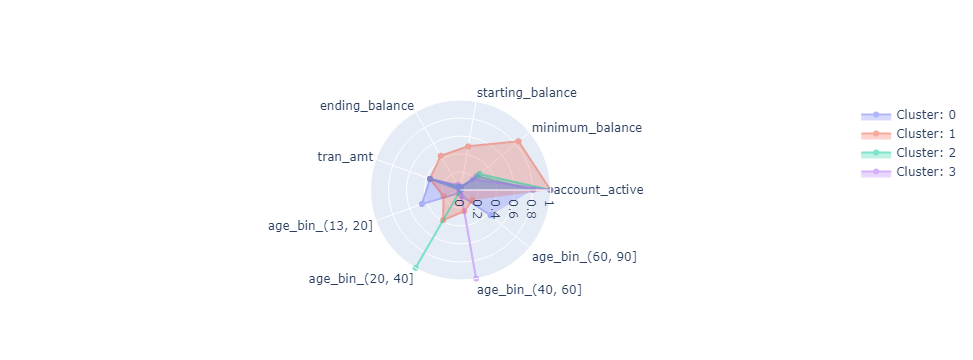

In [80]:
plot_radar(saving_radar)